In [1]:
path='/Users/Leon/Documents/Data GH/Vision Computación/Texturas/Brodatz_examples'

In [2]:
import os
from skimage import io


# Lista para almacenar las imágenes en su formato original
imagenes = []
nombres_archivos = []

# Recorrer la carpeta y cargar las imágenes .bmp
for archivo in os.listdir(path):
    if archivo.lower().endswith(".bmp"):
        ruta = os.path.join(path, archivo)
        img = io.imread(ruta)
        imagenes.append(img)
        nombres_archivos.append(archivo)

In [3]:
import random
# Emparejar nombre + imagen
imagenes_con_nombre = list(zip(nombres_archivos, imagenes))

# Barajar y seleccionar 4 al azar para test
random.seed(42)  # Para reproducibilidad
random.shuffle(imagenes_con_nombre)
test_set = imagenes_con_nombre[:5]
train_set = imagenes_con_nombre[5:]

# Separar nombres e imágenes para cada conjunto
nombres_test, imagenes_test = zip(*test_set)
nombres_train, imagenes_train = zip(*train_set)

In [10]:
nombres_test

('D94.bmp', 'D17.bmp', 'D103.bmp', 'D34.bmp', 'D51.bmp')

In [13]:
from skimage.util import view_as_windows


# Tamaño del texel
tamaño_texel = (64, 64)
stride = 64

# Diccionario para guardar los texeles por imagen
texeles_train = {}

for nombre, imagen in zip(nombres_train, imagenes_train):
    alto, ancho = imagen.shape[:2]
    
    # Validación: convertir a escala de grises si es RGB
    if len(imagen.shape) == 3:
        from skimage.color import rgb2gray
        imagen = rgb2gray(imagen)
    
    # Extraer ventanas
    ventanas = view_as_windows(imagen, tamaño_texel, step=stride)
    ventanas = ventanas.reshape(-1, *tamaño_texel)
    
    texeles_train[nombre] = ventanas
    print(f"Imagen '{nombre}' → {ventanas.shape[0]} texeles generados.")


Imagen 'D85.bmp' → 100 texeles generados.
Imagen 'D8.bmp' → 100 texeles generados.
Imagen 'D46.bmp' → 100 texeles generados.
Imagen 'D96.bmp' → 100 texeles generados.
Imagen 'D56.bmp' → 100 texeles generados.
Imagen 'D1.bmp' → 100 texeles generados.
Imagen 'D52.bmp' → 100 texeles generados.
Imagen 'D104.bmp' → 100 texeles generados.
Imagen 'D64.bmp' → 100 texeles generados.
Imagen 'D48.bmp' → 100 texeles generados.
Imagen 'D3.bmp' → 100 texeles generados.
Imagen 'D20.bmp' → 100 texeles generados.
Imagen 'D6.bmp' → 100 texeles generados.
Imagen 'D101.bmp' → 100 texeles generados.
Imagen 'D65.bmp' → 100 texeles generados.
Imagen 'D49.bmp' → 100 texeles generados.
Imagen 'D10.bmp' → 100 texeles generados.
Imagen 'D16.bmp' → 100 texeles generados.
Imagen 'D26.bmp' → 100 texeles generados.


In [15]:

# Diccionario para guardar los texeles por imagen
texeles_test = {}

for nombre, imagen in zip(nombres_test, imagenes_test):
    alto, ancho = imagen.shape[:2]
    
    # Validación: convertir a escala de grises si es RGB
    if len(imagen.shape) == 3:
        from skimage.color import rgb2gray
        imagen = rgb2gray(imagen)
    
    # Extraer ventanas
    ventanas = view_as_windows(imagen, tamaño_texel, step=stride)
    ventanas = ventanas.reshape(-1, *tamaño_texel)
    
    texeles_train[nombre] = ventanas
    print(f"Imagen '{nombre}' → {ventanas.shape[0]} texeles generados.")

Imagen 'D94.bmp' → 100 texeles generados.
Imagen 'D17.bmp' → 100 texeles generados.
Imagen 'D103.bmp' → 100 texeles generados.
Imagen 'D34.bmp' → 100 texeles generados.
Imagen 'D51.bmp' → 100 texeles generados.


In [16]:
texeles_test

{}

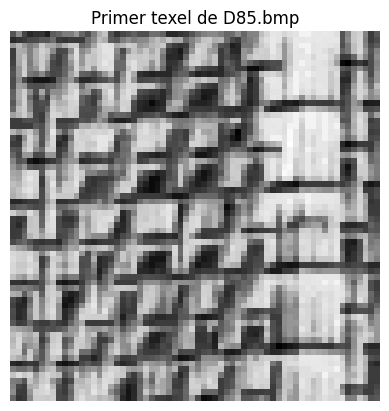

In [6]:
# Mostrar el primer texel (opcional)
import matplotlib.pyplot as plt

# Ejemplo: acceso a texeles 
imng_txl = nombres_train[0]
texel = texeles_train[imng_txl][1]


plt.imshow(texel, cmap='gray')
plt.title(f"Primer texel de {imng_txl}")
plt.axis('off')
plt.show()


In [7]:
from skimage.feature import graycomatrix, graycoprops
import numpy as np

def extraer_huella_digital(texel):
    texel_uint8 = (texel * 255).astype(np.uint8)

    # Dos configuraciones diferentes
    configuraciones = [
        (1, 0),
        (2, np.pi/4)
    ]

    propiedades = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']
    vector_caracteristicas = []

    for distancia, angulo in configuraciones:
        glcm = graycomatrix(
            texel_uint8,
            distances=[distancia],
            angles=[angulo],
            levels=256,
            symmetric=True,
            normed=True
        )

        for prop in propiedades:
            valor = graycoprops(glcm, prop)[0, 0]  # Solo una distancia y ángulo por vez
            vector_caracteristicas.append(valor)

    return vector_caracteristicas



In [8]:
X_train = []
y_train = []

for idx, nombre in enumerate(nombres_train):
    for texel in texeles_train[nombre]:
        vector = extraer_huella_digital(texel)
        X_train.append(vector)
        y_train.append(nombre)



In [11]:
X_test = []
y_test = []

for idx, nombre in enumerate(nombres_test):
    for texel in texeles_test[nombre]:
        vector = extraer_huella_digital(texel)
        X_test.append(vector)
        y_test.append(nombre)

KeyError: 'D94.bmp'

In [12]:
texeles_test

{}